# cross_val_score(교차검증) 1

In [1]:
import pandas as pd

df = pd.read_csv("c:/workspace3/data/customer.csv")
df.head()

,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [2]:
X=df[df.columns[:-1]]
y=df['Churn']
y.value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

In [3]:
#언더샘플링

from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp=pd.DataFrame(data=X_sample,columns=df.columns[:-1])
y_samp = pd.DataFrame(data=y_sample,columns=['Churn'])

df_samp=pd.concat([X_samp,y_samp],axis=1)
df_samp['Churn'].value_counts()

Churn
0    483
1    483
Name: count, dtype: int64

In [4]:
X=df_samp[df_samp.columns[:-1]]
y=df_samp['Churn']

In [15]:
print(y)
X.head(3)

910     0
205     0
767     0
695     0
751     0
       ..
3301    1
3304    1
3320    1
3322    1
3323    1
Name: Churn, Length: 966, dtype: int64


,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
910,0,1,32,163.8,80,27.85,177.8,123,15.11,190.4,106,8.57,8.1,5,2.19,0
205,0,1,36,106.7,76,18.14,209.8,77,17.83,190.4,117,8.57,12.1,2,3.27,1
767,0,1,26,244.9,150,41.63,118.0,138,10.03,236.0,91,10.62,15.2,4,4.10,2


<Axes: >

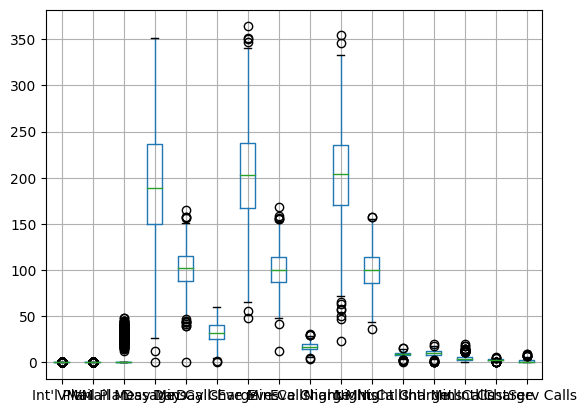

In [5]:
X.boxplot()

In [6]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X))

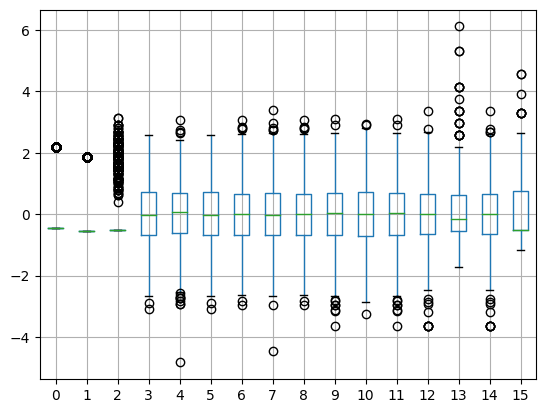

In [7]:
import matplotlib.pyplot as plt

X_scaled.boxplot()  
plt.show()

In [9]:
# 베깅모델

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

svm = SVC()
n_estimators = 10

model = BaggingClassifier(base_estimator=svm,
                          n_estimators=n_estimators,    # 분류기수
                          max_samples=1/n_estimators)   # 부트스트랩

In [20]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold

costs = np.logspace(-10, 3, 14) # 10의 -10승부터 10의 3승까지 14개
scores = []

for c in costs:
    model.base_estimator.C = c

    #교차검증
    cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=True)
#       동일한 개수로 나눔

    this_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')
#                   교차검증 함수

    score=np.max(this_scores)
    print(c,'==>',score)

    scores.append(score)

print('='* 40)
print('max:',max(scores))
print('idx:',np.argmax(scores))
print('C:',costs[np.argmax(scores)])

1e-10 ==> 0.5025906735751295
1e-09 ==> 0.5025906735751295
1e-08 ==> 0.5025906735751295
1e-07 ==> 0.5025906735751295
1e-06 ==> 0.5025906735751295
1e-05 ==> 0.5025906735751295
0.0001 ==> 0.5025906735751295
0.001 ==> 0.5025906735751295
0.01 ==> 0.5025906735751295
0.1 ==> 0.5103092783505154
1.0 ==> 0.8601036269430051
10.0 ==> 0.8808290155440415
100.0 ==> 0.8290155440414507
1000.0 ==> 0.8549222797927462
max: 0.8808290155440415
idx: 11
C: 10.0


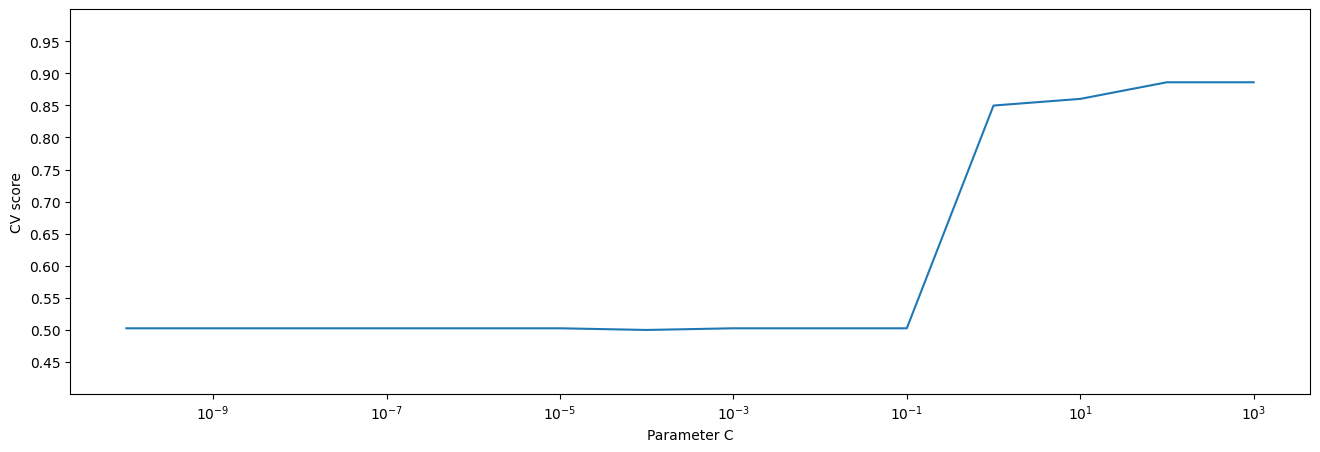

In [11]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=(16,5)
plt.semilogx(costs, scores)

locs, labels = plt.yticks()

plt.yticks(locs)
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0.4, 1)
plt.show()